# Entrega

​Deben tener el código en un script .py o Jupyter Notebook .ipynb, el cual debe incluir un buen EDA, feature engineerging y, de ser posible, un pipeline de Machine Learning para el procesamiento de datos que consideren necesario. Es importante explicar claramente cada paso realizado mediante comentarios en el script o textos formato markdown dentro del Notebook, pensar que cualquier persona (en este caso serán los Henry Mentors evaluadores) debe entender de la mejor manera posible cada razonamiento y pasos aplicados.​Recuerden, además, que deben enviar el repositorio que contenga el proyecto, por lo que es importante que le dediquen tiempo también a esta parte, dejando todo ordenado y con un README acorde, que sirva de introducción al contenido dentro de éste.​Por otro lado, es obligatorio que el script genere un archivo .csv sólo con las predicciones, teniendo únicamente una sola columna (sin index) que debe llamarse 'pred' y tenga todos los valores de las predicciones, con un valor por fila. De no llamarse así la única columna, nuestro script de validación NO LO VA A TOMAR y no aparecerán en el dashboard.​El nombre del archivo debe ser su usuario de GitHub, si su usuario de GitHub es 'pjr95', el archivo .csv con las predicciones debe llamarse 'pjr95.csv'. Vamos a validar tanto los datos que suban como el código, por lo que seguir estos pasos es fundamental.​Cuando entreguen les pedimos que verifiquen que su usuario de GitHub aparezca en el dashboard. En caso de que no aparezca, tal como se comentó más arriba, es debido a que el archivo entregado con las predicciones no cumple con los requisitos solicitados.​

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [122]:
trains=pd.read_csv("properties_colombia_train.csv")
trains

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431)


In [123]:
train=trains.copy() # Realizamos una copia al Dataframe importado originalmente.

In [4]:
promedio=train["price"].mean() # Calcular el promedio de la columna precio, para luego saber que valores serán "1" o "0".
promedio                       # Éste valor es solo para que el usuario sepa cual es el promedio.

643605091.0064613

In [183]:
#train.drop(columns=["price"],inplace=True) # Luego se elimina la columna de precios, ya que no se necesitará más.


In [5]:
train[train.duplicated()] # Se observa si tiene registros duplicados

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry


In [6]:
print("La cantidad de registros duplicados es: ", train.duplicated().sum())

La cantidad de registros duplicados es:  0


In [186]:
# Descartamos las columnas que aportan poca información. En un primer momento se consideraran descartables 
# las columnas que tengan menos de un 25% de valores nulos.
#columnas_descartables = ['l6','surface_total','surface_covered','l5','rooms','price_period','bedrooms','l4']
#train = train.drop(columns=columnas_descartables)
#train.shape

In [7]:
train.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,197549.000000,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05
mean,497437.843851,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08
std,290023.578338,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09
min,0.000000,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,234211.000000,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08
50%,507385.000000,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08
75%,770037.000000,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08
max,993551.000000,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11


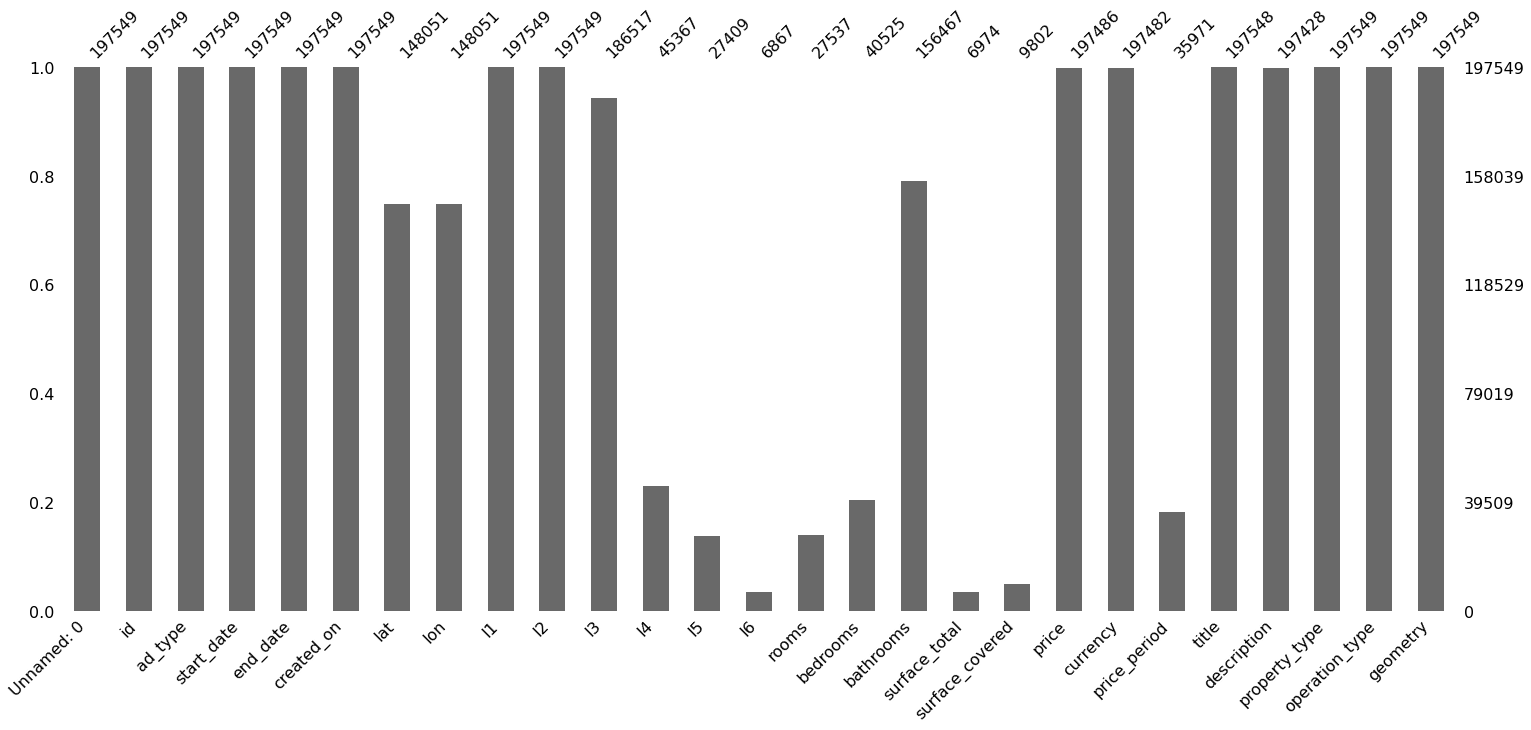

In [8]:
msno.bar(train) # Graficamos, para chequear valores nulos en las distintas columnas para mejorar el análisis.
plt.show()

In [9]:
promedio=train["price"].mean() # Calcular el promedio de la columna precio, para luego saber que valores serán "1" o "0".
promedio                       # Éste valor es solo para que el usuario sepa cual es el promedio de precio. Además,
                                #  es el valor que dispone Henry de promedio y primer paso que debemos realizar.

643605091.0064613

In [10]:
train["target"]=train["price"]>=train["price"].mean() # Los valores mayores o iguales al promedio serán True y los menores False.

In [11]:
train["target"]=train["target"].replace([True,False],[1,0]) # Se reemplaza los valores True por "1" y False por "0"

In [12]:
train["target"].unique() # Los valores únicos de la columna target, son un array de unos y ceros.

array([1, 0], dtype=int64)

In [13]:
train["target"].value_counts() # Esto indica que es un dataset desbalanceado. Y que 151.191 registros corresponden 
                               # a propiedades "baratas" y 46.358 propiedades "caras"

0    151191
1     46358
Name: target, dtype: int64

In [14]:
train["currency"].value_counts() # Identificar los distintos tipos de moneda en el precio y cuantos valores en cada una.

COP    197474
USD         8
Name: currency, dtype: int64

In [15]:
train["currency"].isnull().sum() # Del total de valores de 197.549 filas, hay 67 que en el tipo de moneda, son nulos.

67

In [16]:
print("El porcentaje de valores faltantes en la columna currency es: ", (train.currency.isnull().sum()/len(train)) * 100)

El porcentaje de valores faltantes en la columna currency es:  0.033915636120658677


In [17]:
train["currency"].fillna(0,inplace=True) # Al ser un porcentaje muy minimo, se eliminan las filas.
nulos=train[train["currency"]==0].index
train.drop(nulos,inplace=True)

In [18]:
train["currency"].isnull().sum() # Se observa que ya no se encuentran valores nulos en dicha columna.

0

In [19]:
train # Ahora el Dataframe modificado train, tiene 197.482 filas.

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


Se contempla que hay 8 valores de moneda de precio en USD (dólares) que se deberían cambiar en su tipo de cambio a pesos colombianos para unificar monedas.
La conversión para este análisis, al ser solamente 8 valores, se podría realizar simplificandolo. Simplemente se sacaría un promedio entre la primer fecha de alta del aviso y la última fecha de alta del aviso. Ya que por ser tan pocos valores, no tendría sentido un análisis más exhaustivo de la moneda.

In [20]:
train["start_date"].min() 
# Se observa este valor ya que es la fecha del alta del aviso y por lo tanto es cuando se pone el precio. En dicha fecha
#  el precio del dólar estadounidense según la página dolar-colombia.com fue de $3.690,8 COP.

'2020-07-26'

In [21]:
train["start_date"].max() 
# Para fecha del 31 de diciembre de 2020 según misma página fue de $3.432,50 COP

'2020-12-31'

In [22]:
print("El valor promedio equivalente a pesos colombianos de un dólar, es de: ", np.mean([3690.8,3432.5]))

El valor promedio equivalente a pesos colombianos de un dólar, es de:  3561.65


In [23]:
train[train.currency=="USD"]

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
5902,968218,rbp33S2gwQMUm4uL9uiESg==,Propiedad,2020-08-25,9999-12-31,2020-08-25,4.914310,-73.993189,Colombia,Cundinamarca,...,NaN,750000.0,USD,NaN,Vendo espectacular casa entre Bogota y Briceño,Espectacular casa entre Bogota- Briceño km 12 ...,Casa,Venta,POINT (-73.9931885 4.9143096),0
49196,110,qw+l3GewCFgQ4KH0pxStUA==,Propiedad,2020-10-07,2021-01-22,2020-10-07,10.513831,-75.498685,Colombia,Bolívar,...,NaN,1960000.0,USD,NaN,Exclusive beach house for sale - Manzanillo de...,¡EXCLUSIVE BEACH HOUSE FOR SALE - MANZANILLO D...,Casa,Venta,POINT (-75.4986852407 10.5138313669),0
56159,874575,4p1clkPJ5acEDb9cY38Umg==,Propiedad,2020-10-26,2020-10-26,2020-10-26,4.739003,-74.098302,Colombia,Cundinamarca,...,NaN,850000.0,USD,Mensual,Casa en Venta Costa del Este RAH PA: 20-11172,Viva en una casa espaciosa con terrazas y pati...,Casa,Venta,POINT (-74.098302 4.7390028),0
56522,874396,yu6EN/r21XB3FDkuEVqL+A==,Propiedad,2020-10-26,2020-10-26,2020-10-26,4.695757,-74.043894,Colombia,Cundinamarca,...,NaN,1017000.0,USD,Mensual,Apartamento en Venta Santa Maria RAH PA: 20-10683,Majestuoso apartamento a estrenar con la mejor...,Apartamento,Venta,POINT (-74.0438943 4.6957568),0
116979,51666,EwDsJaQoCbpejoXGZReUjw==,Propiedad,2020-09-13,2021-01-12,2020-09-13,NaN,NaN,Colombia,Santander,...,NaN,1143711.0,USD,NaN,Villa for sale Bali,Villa for sale Bali<br />\n<br />\nLocation: J...,Finca,Venta,POINT EMPTY,0
136236,200614,scSKyD9kllWlPnoFwbwOKw==,Propiedad,2020-09-16,2020-10-29,2020-09-16,4.622794,-74.090960,Colombia,Cundinamarca,...,NaN,65999999.0,USD,NaN,Venta Casa Excelente,<br />\n - Calefacción\n- Parrilla\n <br />\n ...,Casa,Venta,POINT (-74.0909602 4.622794),0
137025,630538,U1bChe1aBazSg0SKUDfWXA==,Propiedad,2020-08-29,9999-12-31,2020-08-29,12.585979,-81.714549,Colombia,San Andrés Providencia y Santa Catalina,...,NaN,3000000.0,USD,NaN,HOTEL EN VENTA EN LA ISLA DE SAN ANDRÉS,\nUn Hotel Boutique TOTALMENTE frente al mar.\...,Otro,Venta,POINT (-81.7145490646 12.5859785199),0
167143,102295,w7sVBDzBykDl7sgZmAQoXw==,Propiedad,2020-08-08,9999-12-31,2020-08-08,10.829302,-75.160260,Colombia,Atlántico,...,NaN,9750000.0,USD,NaN,Lote en venta Vía Barranquilla Cartagena,OPORTUNIDAD DE INVERSIÒN EN EL CARIBE COLOMBIA...,Lote,Venta,POINT (-75.1602602005 10.8293016581),0


Esto se decidió finalmente no cambiar ya que solamente son 8 registros en 197.482 lo que indica un porcentaje MUY INFIMO y no vale la pena su analisis exhaustivo.

In [24]:
train

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


In [25]:
train.drop(columns=["price"],inplace=True) # Luego se elimina la columna de precios, ya que no se necesitará más.


In [26]:
train.isnull().sum() # Se chequea la cantidad de columnas con sus respectivos datos nulos.

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49486
lon                 49486
l1                      0
l2                      0
l3                  11027
l4                 152148
l5                 170099
l6                 190632
rooms              169984
bedrooms           157008
bathrooms           41065
surface_total      190540
surface_covered    187727
currency                0
price_period       161515
title                   1
description           121
property_type           0
operation_type          0
geometry                0
target                  0
dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197482 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197482 non-null  int64  
 1   id               197482 non-null  object 
 2   ad_type          197482 non-null  object 
 3   start_date       197482 non-null  object 
 4   end_date         197482 non-null  object 
 5   created_on       197482 non-null  object 
 6   lat              147996 non-null  float64
 7   lon              147996 non-null  float64
 8   l1               197482 non-null  object 
 9   l2               197482 non-null  object 
 10  l3               186455 non-null  object 
 11  l4               45334 non-null   object 
 12  l5               27383 non-null   object 
 13  l6               6850 non-null    object 
 14  rooms            27498 non-null   float64
 15  bedrooms         40474 non-null   float64
 16  bathrooms        156417 non-null  floa

In [28]:
train.count().sort_values() #Valores no nulos

l6                   6850
surface_total        6942
surface_covered      9755
l5                  27383
rooms               27498
price_period        35967
bedrooms            40474
l4                  45334
lat                147996
lon                147996
bathrooms          156417
l3                 186455
description        197361
title              197481
property_type      197482
operation_type     197482
currency           197482
Unnamed: 0         197482
l2                 197482
l1                 197482
created_on         197482
end_date           197482
start_date         197482
ad_type            197482
id                 197482
geometry           197482
target             197482
dtype: int64

# Desde acá chequear porque cambie el dataset para hacer pruebas.

In [34]:
train2=train.copy()

In [35]:
# Descartamos las columnas que aportan poca información. En un primer momento se consideraran descartables 
# las columnas que tengan menos de un 25% de valores nulos.
columnas_descartables = ['l6','surface_total','surface_covered','l5','rooms','price_period','bedrooms','l4']
train2 = train.drop(columns=columnas_descartables)
train2.shape

(197482, 19)

In [36]:
train2.isnull().sum()

Unnamed: 0            0
id                    0
ad_type               0
start_date            0
end_date              0
created_on            0
lat               49486
lon               49486
l1                    0
l2                    0
l3                11027
bathrooms         41065
currency              0
title                 1
description         121
property_type         0
operation_type        0
geometry              0
target                0
dtype: int64

In [37]:
train2["ad_type"].value_counts() # Esta columna es toda con una misma información, por lo que no aporta información al respecto.
                                # Y se decidirá eliminarla.

Propiedad    197482
Name: ad_type, dtype: int64

In [38]:
train2["operation_type"].value_counts() # Esta columna es toda con una misma información, por lo que no aporta información al respecto.
                                       # Y se decidirá eliminarla.

Venta    197482
Name: operation_type, dtype: int64

In [39]:
# Descartamos las columnas que aportan información única, mencionadas anteriormente. created_on, también se eliminará, ya que contiene
# la fecha de alta de la primera versión del aviso y id también porque no es único, e indica la versión del aviso y es ininteligible

columnas_descartables = ['ad_type','operation_type','created_on','id' ] 
train2 = train2.drop(columns=columnas_descartables)
train2.shape

(197482, 15)

In [40]:
train2["Unnamed: 0"].value_counts() # Indica que tiene valores únicos.

861131    1
265671    1
633707    1
47995     1
924152    1
         ..
211790    1
937649    1
631060    1
671125    1
448114    1
Name: Unnamed: 0, Length: 197482, dtype: int64

In [41]:
train2=train2.rename(columns={"Unnamed: 0":"id_venta"}) # Se cambia el nombre de la variable "Unnamed: 0" por "id_venta"

In [42]:
train2

,id_venta,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,geometry,target
0,861131,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,200972,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,554622,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0
3,540321,2020-11-23,2020-11-30,NaN,NaN,Colombia,Santander,Bucaramanga,1.0,COP,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,POINT EMPTY,1
4,448920,2020-10-06,2020-10-07,NaN,NaN,Colombia,Antioquia,Medellín,2.0,COP,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,2020-10-27,9999-12-31,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,NaN,COP,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,POINT (-74.1619504 4.649682),0
197545,976934,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,POINT (-74.055 4.668),0
197546,508286,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,POINT (-76.541 3.413),0
197547,546633,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,POINT (-74.14707691 4.67487431),0


In [43]:
train2["property_type"].value_counts() # Cuenta la cantidad de valores de cada categoria de "property_type"

Apartamento        100493
Casa                60487
Otro                16526
Lote                16501
Local comercial      1252
Finca                1133
Oficina              1080
Parqueadero            10
Name: property_type, dtype: int64

In [44]:
train2["property_type"]=train2["property_type"].astype("category") # Se pasa el tipo de dato de "property_type" de object 
                                                                   # a category para poder realizar la recategorización.

In [45]:
train2["property_type"].info()

<class 'pandas.core.series.Series'>
Int64Index: 197482 entries, 0 to 197548
Series name: property_type
Non-Null Count   Dtype   
--------------   -----   
197482 non-null  category
dtypes: category(1)
memory usage: 1.7 MB


In [46]:
train2.dropna(inplace=True) # Elimina filas con valores nulos.
train2

,id_venta,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,geometry,target
0,861131,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,200972,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,554622,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0
5,991390,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,POINT (-75.50680161 5.04900894),0
6,51545,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,POINT (-74.0821496 4.732379),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197543,418228,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,APARTAMENTO EN VENTA EN URBANIZACION CASTILLA ...,638-2036 Venta Espectacular Apartamento ubicad...,Apartamento,POINT (-74.1474797 4.6360473),0
197545,976934,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,POINT (-74.055 4.668),0
197546,508286,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,POINT (-76.541 3.413),0
197547,546633,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,POINT (-74.14707691 4.67487431),0


In [47]:
# Dado que los modelos de ML necesitan datos numéricos y para poder recategorizarlos de una manera correcta, se utiliza 
# OneHotEncoder de la libreria de Sklearn.

from sklearn.preprocessing import OneHotEncoder 
codificador=OneHotEncoder()
codificacion=codificador.fit_transform(train[["property_type"]])
tipo_prop=pd.DataFrame(codificacion.toarray(),columns=["apartamento","casa","finca","local_comercial","lote","oficina","otro","parqueadero"])  # columns=codificador.categories_
train2=pd.concat([train2,tipo_prop], axis="columns")
train2

,id_venta,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,...,geometry,target,apartamento,casa,finca,local_comercial,lote,oficina,otro,parqueadero
0,861131.0,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,...,POINT (-75.572 6.203),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972.0,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.0731146 4.7227485),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622.0,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.03 4.709),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,991390.0,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,...,POINT (-75.50680161 5.04900894),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51545.0,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,...,POINT (-74.0821496 4.732379),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
train2.dropna(inplace=True) # Elimina filas con valores nulos.
train2

,id_venta,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,...,geometry,target,apartamento,casa,finca,local_comercial,lote,oficina,otro,parqueadero
0,861131.0,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,...,POINT (-75.572 6.203),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972.0,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.0731146 4.7227485),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622.0,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.03 4.709),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,991390.0,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,...,POINT (-75.50680161 5.04900894),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51545.0,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,...,POINT (-74.0821496 4.732379),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197474,190839.0,2020-08-01,2020-10-26,6.343306,-75.571518,Colombia,Antioquia,Bello,2.0,COP,...,POINT (-75.57151781 6.34330616),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197476,897011.0,2020-11-26,2021-02-19,6.341000,-75.552000,Colombia,Antioquia,Bello,2.0,COP,...,POINT (-75.552 6.341),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197478,745134.0,2020-11-18,2021-07-01,4.651000,-74.056000,Colombia,Cundinamarca,Bogotá D.C,12.0,COP,...,POINT (-74.056 4.651),1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197479,47210.0,2020-12-21,2020-12-21,4.859000,-74.046000,Colombia,Cundinamarca,Chía,3.0,COP,...,POINT (-74.046 4.859),1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
train2["title"].value_counts() # Cantidad de valores de cada categoria en "title"

APARTAMENTO EN VENTA EN PALERMO  MANIZALES SimiCRM                    128
APARTAMENTO EN VENTA EN VILLAMARIA  VILLAMARIA SimiCRM                108
CASA EN VENTA EN VILLAMARIA  VILLAMARIA SimiCRM                        85
AR Inmobiliaria Apartamento para la Venta en Cajicá                    83
APARTAMENTO EN VENTA EN AVENIDA ALBERTO MENDOZA  MANIZALES SimiCRM     76
                                                                     ... 
Apartamento En Venta En Envigado Camino Verde Cod. VRPR8696             1
VENTA CASA SOTOMAYOR                                                    1
VENTA CASA RINCON DE VENECIA                                            1
Vendo Casa Popayan, La aldea                                            1
Apartamento En Venta En Bogota La Cabrera CodVBISA101819                1
Name: title, Length: 57845, dtype: int64

In [ ]:
#train["lat"].min()

In [ ]:
#train["lat"].max()

In [ ]:
#train["lon"].min()

In [ ]:
#train["lon"].max()

In [ ]:
train2

In [50]:
train2["l3"].value_counts() # Cantidad de valores de cada categoria en "l3"

Bogotá D.C      20479
Cali            15579
Manizales       11878
Barranquilla    10162
Medellín         9835
                ...  
Pacho               1
Hispania            1
Tibasosa            1
Cucunubá            1
La Dorada           1
Name: l3, Length: 254, dtype: int64

In [51]:
train2["l1"].value_counts() # Cantidad de valores de cada categoria en "l1"

Colombia    108699
Name: l1, dtype: int64

In [ ]:
# sns.pairplot(train2,hue="target") # Realizar un pairplot con todo el conjunto de datos.

In [52]:
train2.groupby("l2").size() # Detalle de los valores de la columna "l2"

l2
Antioquia                                  18019
Arauca                                         4
Atlántico                                  10464
Bolívar                                     1677
Boyacá                                       171
Caldas                                     12240
Caquetá                                        4
Casanare                                     155
Cauca                                       1329
Cesar                                         75
Cundinamarca                               26720
Córdoba                                       30
Huila                                        458
La Guajira                                     2
Magdalena                                    671
Meta                                        1199
Nariño                                        15
Norte de Santander                          3920
Quindío                                     1611
Risaralda                                   3310
San Andrés Provid

In [53]:
train2.groupby("l3").size() # Detalle de los valores de la columna "l3"

l3
Abejorral         5
Acacías           6
Agua de Dios     17
Aguazul           7
Aipe              1
               ... 
Yotoco            9
Yumbo            44
Zapatoca          1
Zarzal            8
Zipaquirá       309
Length: 254, dtype: int64

In [54]:
train2["bathrooms"].isnull().sum() # Ver valores nulos en "bathrooms"

0

In [55]:
train2

,id_venta,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,...,geometry,target,apartamento,casa,finca,local_comercial,lote,oficina,otro,parqueadero
0,861131.0,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,...,POINT (-75.572 6.203),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972.0,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.0731146 4.7227485),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622.0,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.03 4.709),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,991390.0,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,...,POINT (-75.50680161 5.04900894),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51545.0,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,...,POINT (-74.0821496 4.732379),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197474,190839.0,2020-08-01,2020-10-26,6.343306,-75.571518,Colombia,Antioquia,Bello,2.0,COP,...,POINT (-75.57151781 6.34330616),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197476,897011.0,2020-11-26,2021-02-19,6.341000,-75.552000,Colombia,Antioquia,Bello,2.0,COP,...,POINT (-75.552 6.341),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197478,745134.0,2020-11-18,2021-07-01,4.651000,-74.056000,Colombia,Cundinamarca,Bogotá D.C,12.0,COP,...,POINT (-74.056 4.651),1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197479,47210.0,2020-12-21,2020-12-21,4.859000,-74.046000,Colombia,Cundinamarca,Chía,3.0,COP,...,POINT (-74.046 4.859),1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
trainmodel=subset=train2[["bathrooms","l2","l3","target","apartamento","casa","finca","local_comercial",
                        "lote","oficina","otro","parqueadero"]] # Realizar un subset para el modelo

In [57]:
trainmodel # Ver subset del modelo.

,bathrooms,l2,l3,target,apartamento,casa,finca,local_comercial,lote,oficina,otro,parqueadero
0,4.0,Antioquia,Medellín,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Cundinamarca,Bogotá D.C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Cundinamarca,Bogotá D.C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,Caldas,Manizales,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.0,Cundinamarca,Bogotá D.C,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197474,2.0,Antioquia,Bello,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197476,2.0,Antioquia,Bello,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197478,12.0,Cundinamarca,Bogotá D.C,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197479,3.0,Cundinamarca,Chía,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


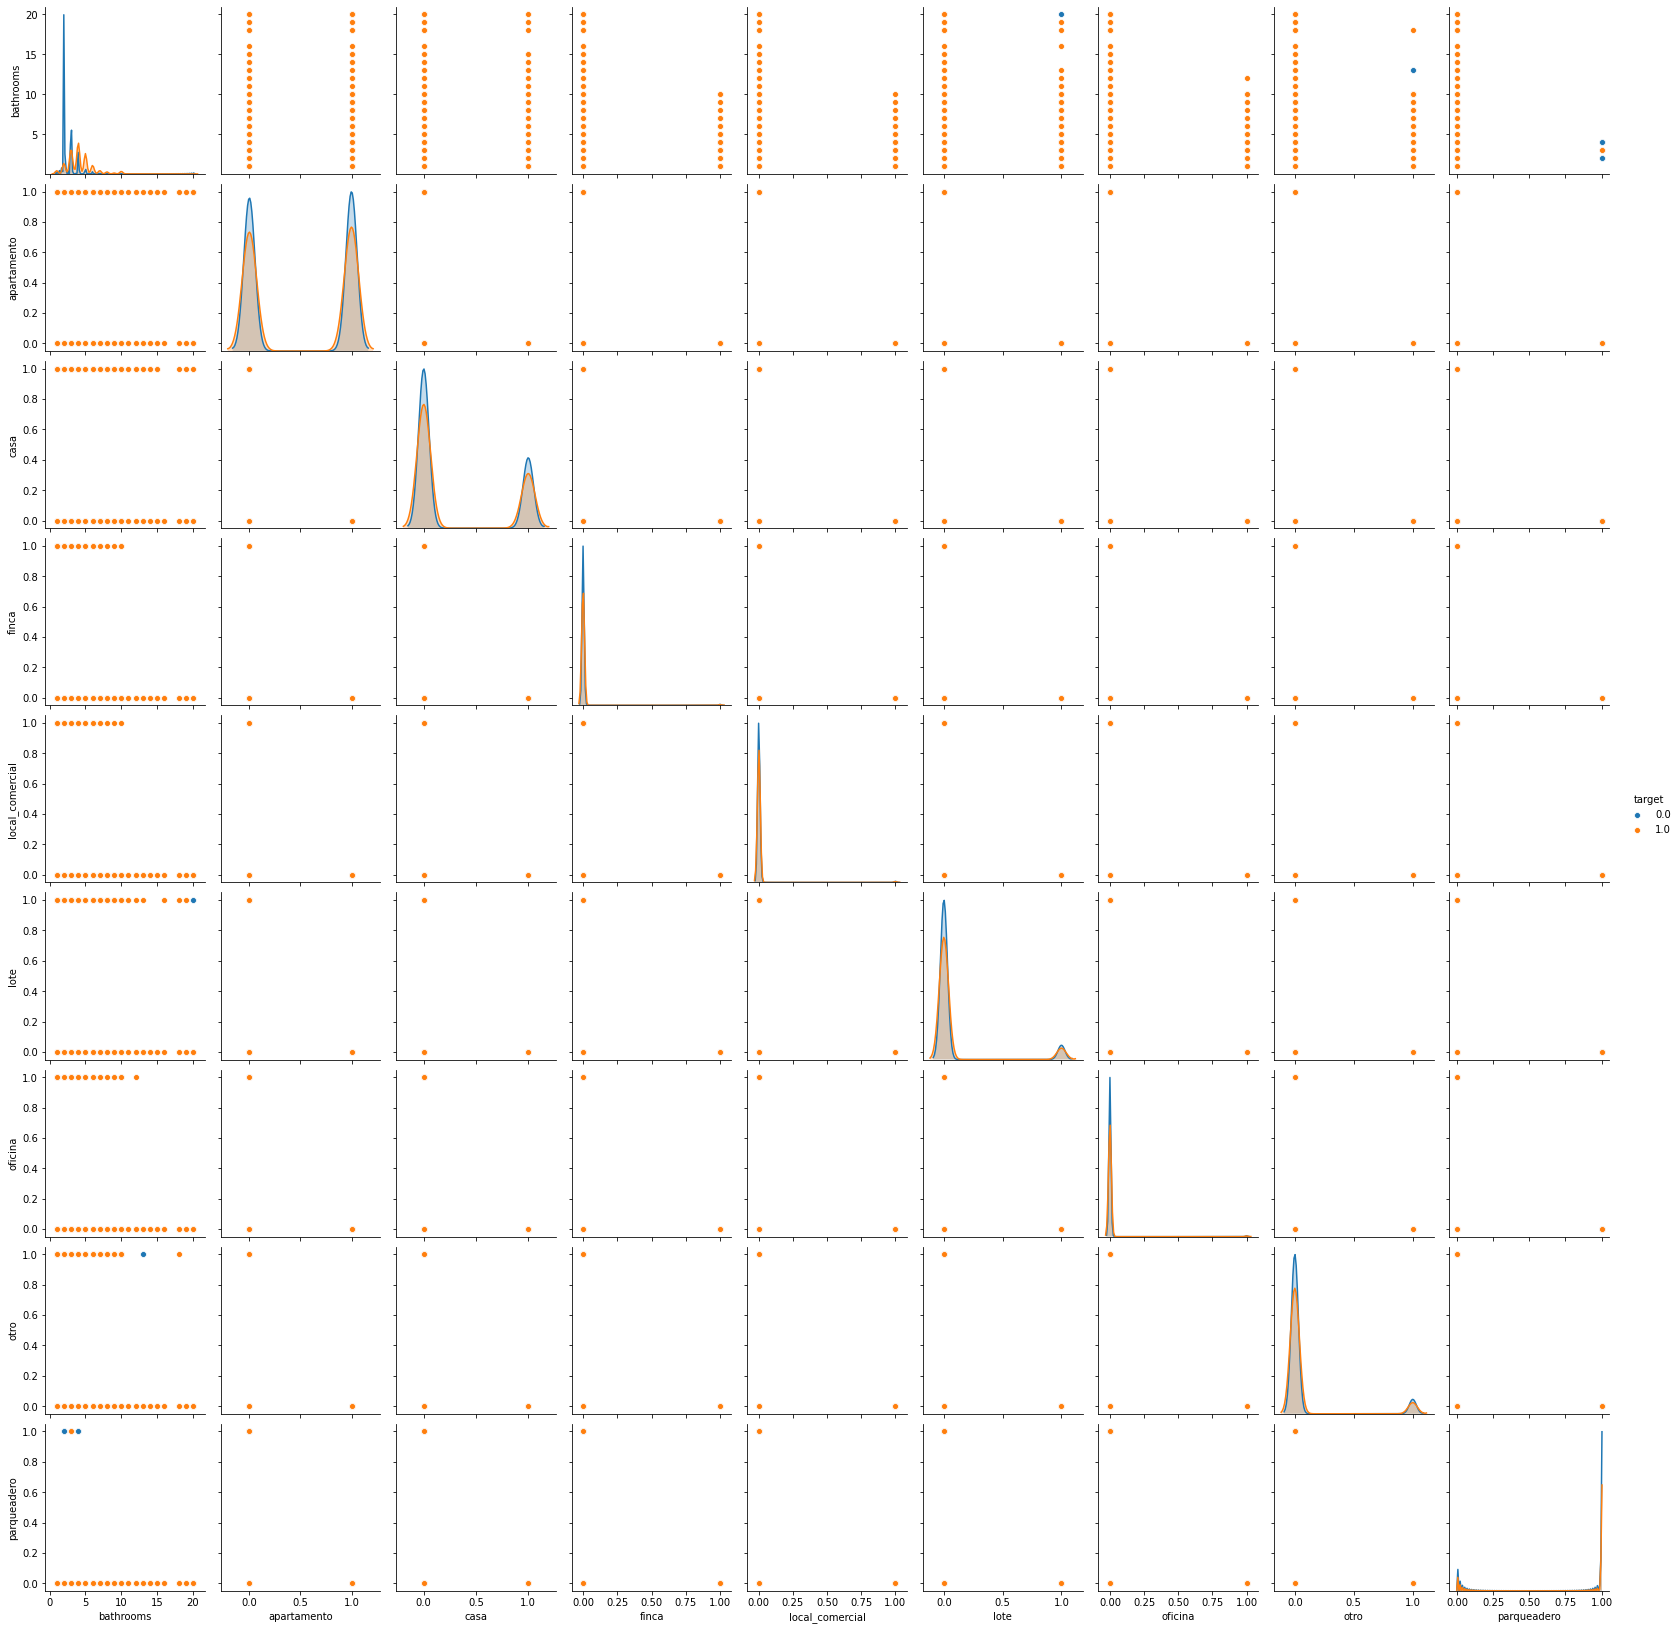

In [238]:
sns.pairplot(trainmodel,hue="target") # pairplot del modelo para entrenar.

In [ ]:
# promedio=train["bathrooms"].mean()

In [ ]:
# train["bathrooms"].fillna(promedio,inplace=True)

In [ ]:
# train["bathrooms"].info()

In [ ]:
#train["surface_total"].info()

In [59]:
train2["target"].value_counts() # Cantidad de valores de cada tipo en "target."


0.0    84829
1.0    23870
Name: target, dtype: int64

In [60]:
train2

,id_venta,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,...,geometry,target,apartamento,casa,finca,local_comercial,lote,oficina,otro,parqueadero
0,861131.0,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,...,POINT (-75.572 6.203),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972.0,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.0731146 4.7227485),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622.0,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.03 4.709),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,991390.0,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,...,POINT (-75.50680161 5.04900894),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51545.0,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,...,POINT (-74.0821496 4.732379),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197474,190839.0,2020-08-01,2020-10-26,6.343306,-75.571518,Colombia,Antioquia,Bello,2.0,COP,...,POINT (-75.57151781 6.34330616),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197476,897011.0,2020-11-26,2021-02-19,6.341000,-75.552000,Colombia,Antioquia,Bello,2.0,COP,...,POINT (-75.552 6.341),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197478,745134.0,2020-11-18,2021-07-01,4.651000,-74.056000,Colombia,Cundinamarca,Bogotá D.C,12.0,COP,...,POINT (-74.056 4.651),1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197479,47210.0,2020-12-21,2020-12-21,4.859000,-74.046000,Colombia,Cundinamarca,Chía,3.0,COP,...,POINT (-74.046 4.859),1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
# Separamos los datos de entrenamiento y testeo para entrenar el modelo utilizando las varibales elegidas.
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    train2[[ "bathrooms","apartamento","casa","finca","local_comercial","lote","oficina","otro","parqueadero"]],
    train2["target"], 
    test_size=0.30) 

El accuracy del modelo es:  0.8377184912603496
|--- bathrooms <= 3.50
|   |--- bathrooms <= 2.50
|   |   |--- bathrooms <= 1.50
|   |   |   |--- class: 0.0
|   |   |--- bathrooms >  1.50
|   |   |   |--- class: 0.0
|   |--- bathrooms >  2.50
|   |   |--- casa <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- casa >  0.50
|   |   |   |--- class: 0.0
|--- bathrooms >  3.50
|   |--- bathrooms <= 4.50
|   |   |--- parqueadero <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- parqueadero >  0.50
|   |   |   |--- class: 0.0
|   |--- bathrooms >  4.50
|   |   |--- bathrooms <= 9.50
|   |   |   |--- class: 1.0
|   |   |--- bathrooms >  9.50
|   |   |   |--- class: 1.0



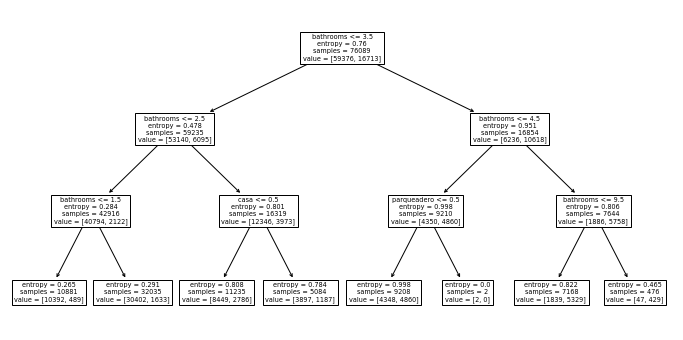

In [120]:
# Entrenamiento y muestra del modelo de arboles de decisión según su "entropía" y con una profundidad de 3.

from sklearn import tree


arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)


print("El accuracy del modelo es: ", accuracy)


print(tree.export_text(arbol,
                      feature_names=[ "bathrooms","apartamento","casa","finca","local_comercial","lote","oficina","otro","parqueadero"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=[ "bathrooms","apartamento","casa","finca","local_comercial","lote","oficina","otro","parqueadero"])
plt.show()

In [75]:
test=pd.read_csv("properties_colombia_test.csv") # Se importa el archivo para testear los datos.
test

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,400341,RuyWia5y5aifsVVKmIUSnw==,Propiedad,2020-12-02,2021-08-03,2020-12-02,6.212981,-75.599349,Colombia,Antioquia,...,NaN,NaN,NaN,COP,NaN,Venta de Apartamento La Mota,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta,POINT (-75.5993485451 6.2129806633)
65846,144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,2020-07-27,5.041331,-75.512415,Colombia,Caldas,...,1.0,NaN,NaN,COP,NaN,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)
65847,817321,BFgIYQiaJNz/d9548oqXUg==,Propiedad,2020-11-06,2020-11-06,2020-11-06,5.064733,-75.670570,Colombia,Caldas,...,2.0,NaN,NaN,COP,Mensual,Vende casa campestre en Santagueda _ wasi660842,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta,POINT (-75.67057009 5.06473281)
65848,859339,DSSyKe2ynj2Iqkq1Tz4c0w==,Propiedad,2020-12-14,2020-12-14,2020-12-14,7.138641,-73.127312,Colombia,Santander,...,2.0,NaN,NaN,COP,Mensual,Vendo apto facilidad de pago,Vendo apto bien ubicado 3 habitación 2 baños s...,Apartamento,Venta,POINT (-73.12731171 7.13864078)


In [76]:
test.dropna() # Se eliminan los nulos del dataset test.

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
4791,125805,hj04BzXQ505/FJ7yiPQchg==,Propiedad,2020-10-09,2020-10-09,2020-10-09,4.674,-74.052,Colombia,Cundinamarca,...,5.0,197.0,196.0,COP,Mensual,Apartamento En Venta En Bogota El Chico Cod. V...,"Venta Apartamento ubicado en El Chic, emplazad...",Apartamento,Venta,POINT (-74.052 4.674)
5431,255619,iF9oOxAE5dLTl4Ez+w8tiA==,Propiedad,2020-10-22,2020-10-25,2020-10-22,4.722,-74.066,Colombia,Cundinamarca,...,4.0,125.0,125.0,COP,Mensual,Casa En Venta En Bogota Iberia Cod. VINH2899,Hermosa casa remodelada de tres niveles ubic...,Casa,Venta,POINT (-74.066 4.722)
20859,255074,sZqvnUBJJtzvX9UunZZRYA==,Propiedad,2020-10-22,2020-11-12,2020-10-22,4.730,-74.047,Colombia,Cundinamarca,...,2.0,86.0,86.0,COP,Mensual,Apartamento En Arriendo/venta En Bogota Cedrit...,Fabuloso apartamento ubicado en el Barrio Cedr...,Apartamento,Venta,POINT (-74.047 4.73)
38381,852865,4/aqENWOVuack3hRwCMQ1A==,Propiedad,2020-09-04,2020-09-04,2020-09-04,4.675,-74.054,Colombia,Cundinamarca,...,5.0,217.0,217.0,COP,Mensual,Apartamento En Venta En Bogota El Chico Cod. V...,Acogedor apartamento de 217 m2 en el barrio El...,Apartamento,Venta,POINT (-74.054 4.675)
40143,852520,Vh24CLqxoL4KNCb7o4swEg==,Propiedad,2020-09-04,2020-09-04,2020-09-04,4.680,-74.055,Colombia,Cundinamarca,...,3.0,92.0,92.0,COP,Mensual,Apartamento En Arriendo/venta En Bogota El Chi...,Lindo apartamento de 92 Mts2 ms 3 Mts2 de balc...,Apartamento,Venta,POINT (-74.055 4.68)
45269,852761,sWtWQTqbL0x+crQ7GWo1mg==,Propiedad,2020-09-04,2020-09-04,2020-09-04,4.670,-74.042,Colombia,Cundinamarca,...,4.0,208.0,208.0,COP,Mensual,Apartamento En Venta En Bogota Chico Alto Cod....,"Apt con vista panormica, 3 alcobas, CBS, dos s...",Apartamento,Venta,POINT (-74.042 4.67)
57642,631364,WdPGoehWy95+6mTEHr61uA==,Propiedad,2020-08-29,2020-10-09,2020-08-29,4.715,-74.031,Colombia,Cundinamarca,...,2.0,90.0,90.0,COP,Mensual,Apartamento En Venta En Bogota Cedritos-Usaqun...,"Venta de apartamento en cedritos, consta de a...",Apartamento,Venta,POINT (-74.031 4.715)
63384,852005,2oArWjIBxowYFE+UozP3bQ==,Propiedad,2020-09-04,2020-09-04,2020-09-04,4.679,-74.055,Colombia,Cundinamarca,...,2.0,55.0,55.0,COP,Mensual,Apartamento En Venta En Bogota El Chico Cod. V...,"Lindo apartamento de 55 Mts2, una alcoba, dos ...",Apartamento,Venta,POINT (-74.055 4.679)


In [77]:
# Se utilizan los mismos criterios (features) del set de entrenamiento, para poder evaluar uniformemente.

codificadortest=OneHotEncoder()
codificaciontest=codificadortest.fit_transform(test[["property_type"]])
tipo_prop=pd.DataFrame(codificaciontest.toarray(),columns=["apartamento","casa","finca","local_comercial","lote","oficina","otro","parqueadero"])  # columns=codificador.categories_
test=pd.concat([test,tipo_prop], axis="columns")
test

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,operation_type,geometry,apartamento,casa,finca,local_comercial,lote,oficina,otro,parqueadero
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,Venta,POINT (-74.075 4.722),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,Venta,POINT EMPTY,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,Venta,POINT (-75.6283806 6.25925267),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,...,Venta,POINT (-75.556 6.203),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,...,Venta,POINT EMPTY,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,400341,RuyWia5y5aifsVVKmIUSnw==,Propiedad,2020-12-02,2021-08-03,2020-12-02,6.212981,-75.599349,Colombia,Antioquia,...,Venta,POINT (-75.5993485451 6.2129806633),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65846,144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,2020-07-27,5.041331,-75.512415,Colombia,Caldas,...,Venta,POINT (-75.5124152 5.0413313),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65847,817321,BFgIYQiaJNz/d9548oqXUg==,Propiedad,2020-11-06,2020-11-06,2020-11-06,5.064733,-75.670570,Colombia,Caldas,...,Venta,POINT (-75.67057009 5.06473281),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65848,859339,DSSyKe2ynj2Iqkq1Tz4c0w==,Propiedad,2020-12-14,2020-12-14,2020-12-14,7.138641,-73.127312,Colombia,Santander,...,Venta,POINT (-73.12731171 7.13864078),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:

trainmodel=subset=train2[["bathrooms","l2","l3","target","apartamento","casa","finca","local_comercial",
                        "lote","oficina","otro","parqueadero"]]

In [79]:
# Se separan los features como modelo
testmodel=subset=test[["bathrooms","apartamento","casa","finca","local_comercial","lote","oficina","otro","parqueadero"]]

In [82]:
testmodel.bathroom # Se observa que el feature "bathroom" contiene nulos y por ende no se le podrá aplicar el modelo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        52054 non-null  float64
 1   apartamento      65850 non-null  float64
 2   casa             65850 non-null  float64
 3   finca            65850 non-null  float64
 4   local_comercial  65850 non-null  float64
 5   lote             65850 non-null  float64
 6   oficina          65850 non-null  float64
 7   otro             65850 non-null  float64
 8   parqueadero      65850 non-null  float64
dtypes: float64(9)
memory usage: 4.5 MB


In [83]:
promedio=testmodel["bathrooms"].mean() # Se calcula la media de la columna "bathrooms" para poder reemplazar los valores nulos.

In [84]:
testmodel.fillna(promedio,inplace=True) # Se reemplazan los valores nulos por su promedio.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8264\1044090712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testmodel.fillna(promedio,inplace=True)


In [100]:
# Predicción con el modelo.
prediccion=arbol_decision.predict(testmodel)

In [102]:
# Creación del DataFrame para preparar el archivo a exportar.
pred=pd.DataFrame(prediccion,columns=["pred"])
pred

,pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
65845,0.0
65846,0.0
65847,0.0
65848,0.0


In [108]:
pred.value_counts() # Cantidad de valores en cada una de las alternativas de predicción.

pred
0.0     55400
1.0     10450
dtype: int64

Esto indica que del total de 65.850 valores predichos, el modelo predice que 55.400 propiedades son consideradas "baratas" y 10.450 propiedades se estiman "caras".

In [ ]:
"""from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
recall= recall_score(datos_prueba,clase_prueba)
print("El recall del modelo es: ", recall)"""

In [ ]:
# Debe quedar el archivo solamente con la columna "pred". Que tenga todos los valores de la predicción.

In [127]:
pred


,pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
65845,0.0
65846,0.0
65847,0.0
65848,0.0


In [107]:
pred.to_csv("AxelM1989.csv",index=False) # Exportar archivo csv con nombre de usuario en GitHub y sin index.